# Multiclass Logistic Regression 

By default sklearn is going to use the One Vs. Rest Approach. Let's train a model using sklearn's wine dataset 

In [1]:
#Setup the Dataset 
from sklearn.datasets import load_wine
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [2]:
X = wine.data
y = wine.target 

import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [11]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [6]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
#Split our data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression(multi_class='ovr')#This is the default setting 
#Fit the model 
log_reg_clf.fit(X_train, y_train)
#Predictions 
ovr_pred = log_reg_clf.predict(X_test)
#Score 
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, ovr_pred))

0.9166666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
confusion_matrix(y_test, ovr_pred)

array([[10,  0,  0],
       [ 0, 15,  3],
       [ 0,  0,  8]])

In [10]:
log_reg_clf.predict_proba(X_test)

array([[4.18431927e-02, 9.47349670e-01, 1.08071376e-02],
       [1.34191780e-03, 9.92412545e-01, 6.24553727e-03],
       [8.03999087e-01, 1.94179435e-01, 1.82147799e-03],
       [2.69989792e-03, 9.95057512e-01, 2.24258984e-03],
       [9.90266461e-01, 2.92785104e-03, 6.80568793e-03],
       [2.72676349e-02, 9.71760858e-01, 9.71506851e-04],
       [7.81263785e-05, 9.96662659e-01, 3.25921465e-03],
       [9.61181027e-01, 3.50291210e-02, 3.78985218e-03],
       [1.64513985e-03, 9.52822323e-06, 9.98345332e-01],
       [9.98925822e-01, 5.50602982e-06, 1.06867169e-03],
       [9.81490535e-01, 1.36406541e-02, 4.86881068e-03],
       [1.19833858e-01, 8.79203399e-01, 9.62743079e-04],
       [9.84308833e-01, 6.56086599e-04, 1.50350806e-02],
       [1.39537777e-03, 1.88502447e-01, 8.10102175e-01],
       [3.39430501e-03, 9.92503291e-01, 4.10240367e-03],
       [1.18517191e-01, 8.43860673e-01, 3.76221356e-02],
       [1.27849920e-03, 3.42871550e-01, 6.55849951e-01],
       [2.79908393e-01, 7.09963

# k Nearest Neighbors 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [16]:
#Setup our data 
iris=load_iris()
X = iris.data[:, :2]#This will give us only the sepal width and sepal length 
y = iris.target 

In [17]:
#Setup with classfier 
knn_clf = KNeighborsClassifier()#The default value of k is 5 
knn_clf.fit(X,y)

KNeighborsClassifier()

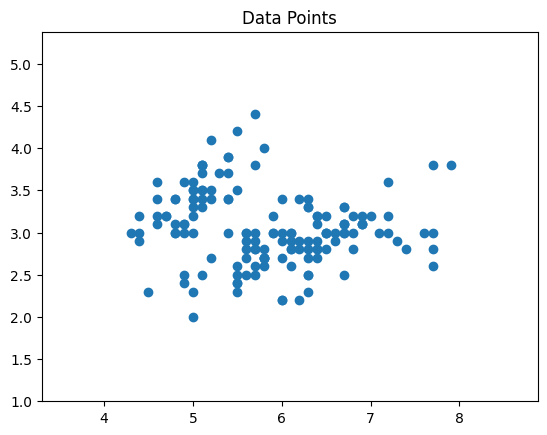

In [20]:
h = 0.02 #Step size for our graph mesh 
#Calculate min, max and the limits 
x_min, x_max = X[:,0].min()-1, X[:,0].max() + 1 
y_min, y_max = X[:,1].min()-1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#Put the result into a color plot 
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Data Points")
plt.show()

Text(0, 0.5, 'Sepal width')

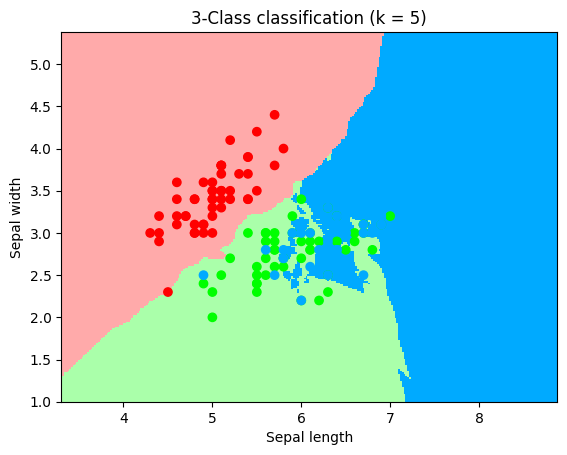

In [21]:
from matplotlib.colors import ListedColormap
# predict class using data and kNN classifier
Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (5))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')